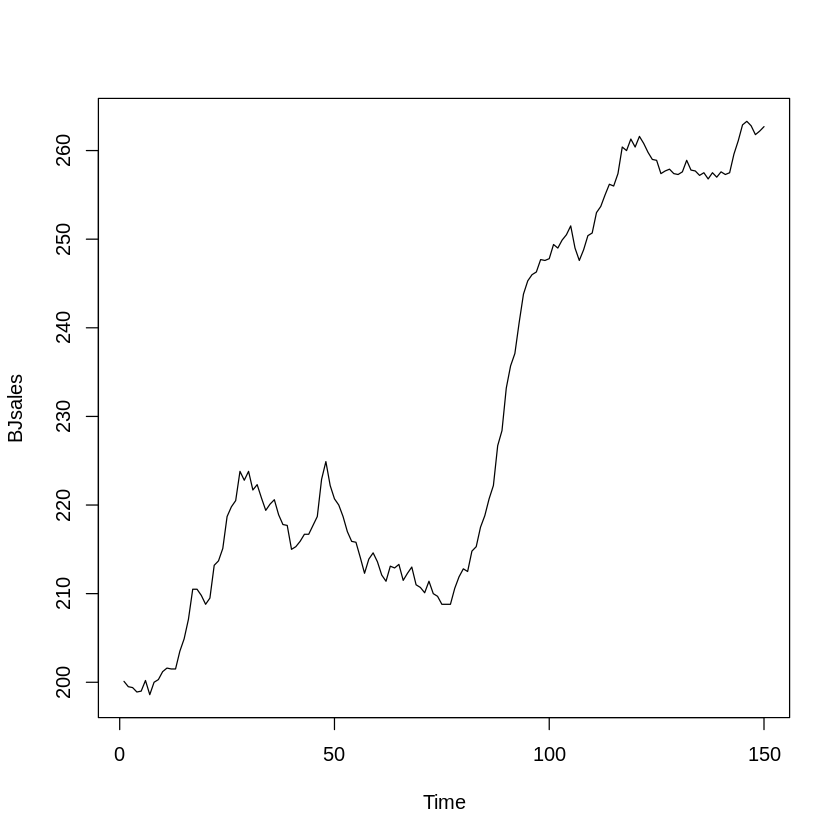

In [1]:
plot(BJsales)

## There are ups and downs with a general upward trend.
## Time series is not stationary.

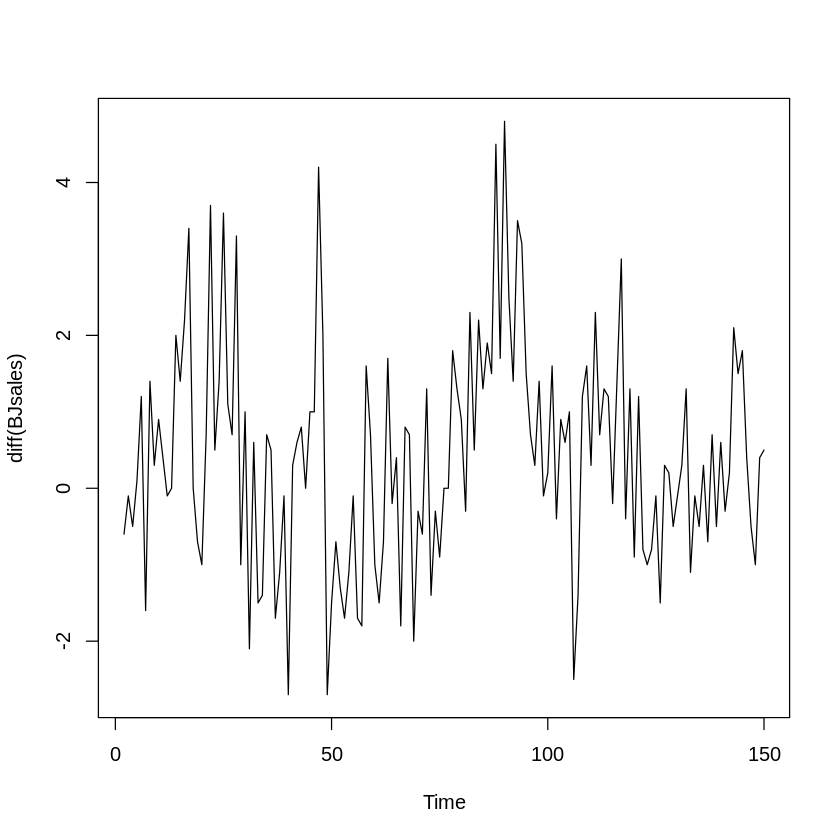

In [2]:
plot(diff(BJsales))

## It does not seem to be stationary since there are still upward or downward trends in different parts of the time plot.
## To get rid of a still remaining trend, we apply one more differencing. Plot the twice differenced time series in the code block below

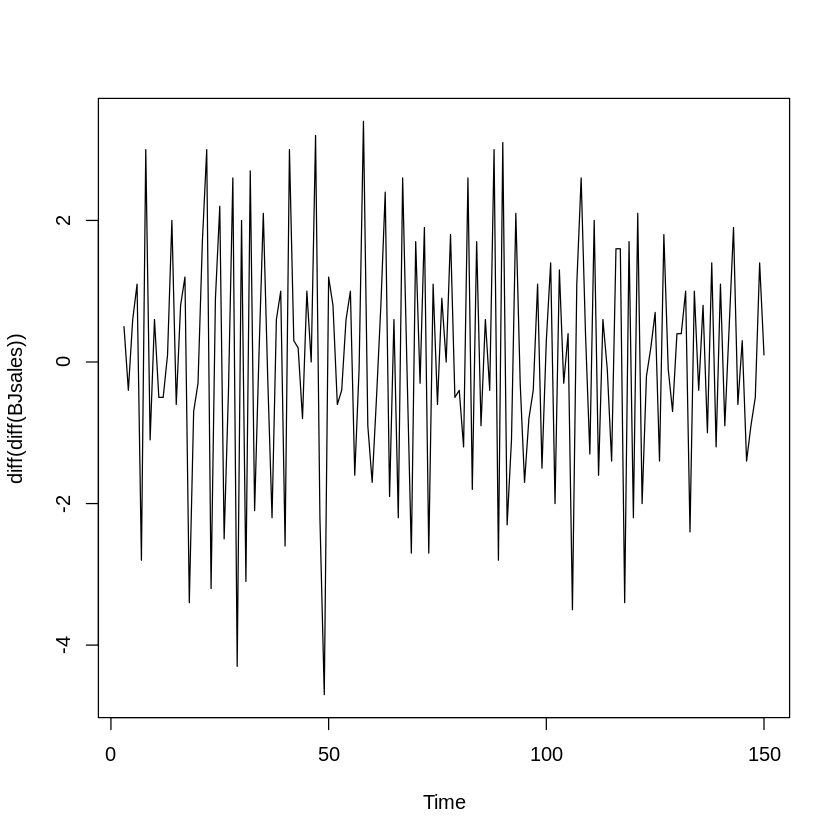

In [3]:
plot(diff(diff(BJsales)))

## Variance towards the end of the series seems to be different from the variance in the other parts of the plot.
## There is no systematic change in mean.

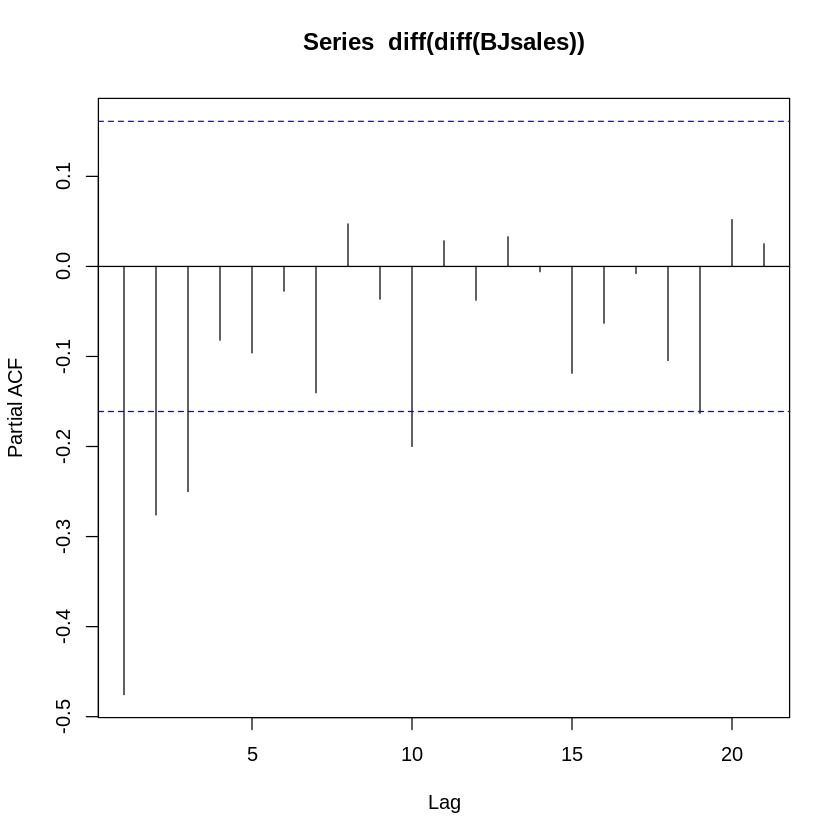

In [5]:
pacf(diff(diff(BJsales)))

## Lag 1, Lag 2, Lag 3, Lag 10, Lag 19 are significant
## Keeping parsimony principle in mind, the order of AR terms can be 0,1,2 or 3.


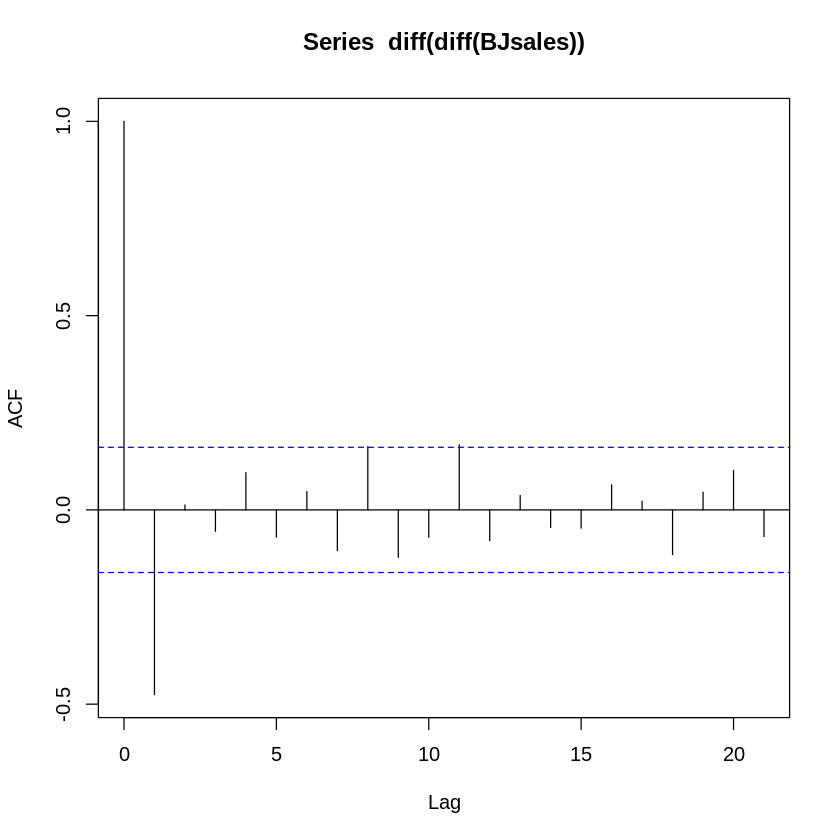

In [7]:
acf(diff(diff(BJsales)))

## Lag 1, Lag 8, Lag 11 are significant
## Keeping parsimony principle in mind, the order of MA term can be 0 or 1.
## If we ignore barely significant lags, the order of MA term can be 0 or 1.

In [10]:
# we try few different models and compare their AIC values.
d=2
for(p in 1:4){
  for(q in 1:2){
        if(p+d+q<=6){
          model<-arima(x=BJsales, order = c((p-1),d,(q-1)))
          pval<-Box.test(model$residuals, lag=log(length(model$residuals)))
          sse<-sum(model$residuals^2)
          cat(p-1,d,q-1, 'AIC=', model$aic, ' SSE=',sse,' p-VALUE=', pval$p.value,'\n')
        }
      }
}

0 2 0 AIC= 577.6777  SSE= 423.7908  p-VALUE= 7.610494e-07 
0 2 1 AIC= 517.1371  SSE= 276.2293  p-VALUE= 0.9632467 
1 2 0 AIC= 541.9646  SSE= 327.92  p-VALUE= 0.003606979 
1 2 1 AIC= 518.9734  SSE= 275.8554  p-VALUE= 0.941776 
2 2 0 AIC= 532.2986  SSE= 302.7467  p-VALUE= 0.05824473 


## ARIMA(0,2,1) has type smallest AIC

In [11]:
d=2
for(p in 1:4){
  for(q in 1:2){
        if(p+d+q<=8){
          model<-arima(x=BJsales, order = c((p-1),d,(q-1)))
          pval<-Box.test(model$residuals, lag=log(length(model$residuals)))
          sse<-sum(model$residuals^2)
          cat(p-1,d,q-1, 'AIC=', model$aic, ' SSE=',sse,' p-VALUE=', pval$p.value,'\n')
        }
      }
}

0 2 0 AIC= 577.6777  SSE= 423.7908  p-VALUE= 7.610494e-07 
0 2 1 AIC= 517.1371  SSE= 276.2293  p-VALUE= 0.9632467 
1 2 0 AIC= 541.9646  SSE= 327.92  p-VALUE= 0.003606979 
1 2 1 AIC= 518.9734  SSE= 275.8554  p-VALUE= 0.941776 
2 2 0 AIC= 532.2986  SSE= 302.7467  p-VALUE= 0.05824473 
2 2 1 AIC= 520.2684  SSE= 274.0474  p-VALUE= 0.7955439 
3 2 0 AIC= 524.7648  SSE= 283.4941  p-VALUE= 0.7035291 
3 2 1 AIC= 519.4182  SSE= 264.0684  p-VALUE= 0.6948066 


## ARIMA(3,2,1)   has the smallest SSE (sum of squared errors)
## We fit ARIMA(0,2,1), and look at the time plot, ACF and PACF of the residuals

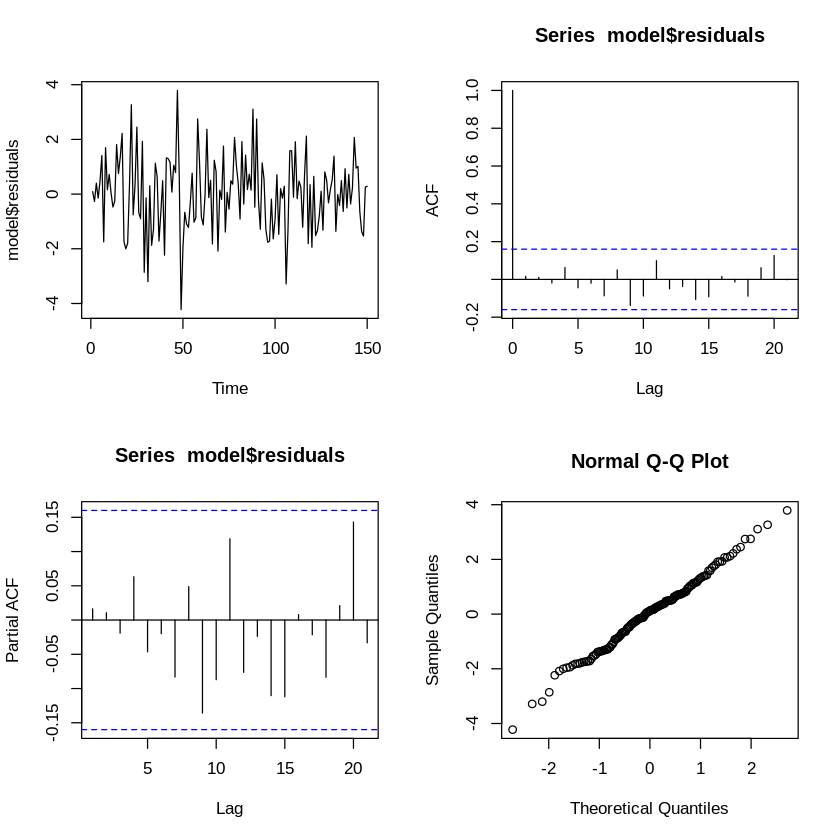

In [12]:
model<-arima(BJsales, order=c(0,2,1))

par(mfrow=c(2,2))

plot(model$residuals)
acf(model$residuals)
pacf(model$residuals)
qqnorm(model$residuals)

## There is no compelling evidence against the whiteness of the residuals since since QQ-plot seems linear and since ACF nad PACF has no significant lags.

In [13]:
library(astsa)

## fitting ARIMA(0,2 ,1)

initial  value 0.525918 
iter   2 value 0.353629
iter   3 value 0.330007
iter   4 value 0.329249
iter   5 value 0.315928
iter   6 value 0.313389
iter   7 value 0.312977
iter   8 value 0.312970
iter   9 value 0.312965
iter   9 value 0.312965
iter   9 value 0.312965
final  value 0.312965 
converged
initial  value 0.314633 
iter   1 value 0.314633
final  value 0.314633 
converged


$fit

Call:
stats::arima(x = xdata, order = c(p, d, q), seasonal = list(order = c(P, D, 
    Q), period = S), include.mean = !no.constant, optim.control = list(trace = trc, 
    REPORT = 1, reltol = tol))

Coefficients:
          ma1
      -0.7480
s.e.   0.0662

sigma^2 estimated as 1.866:  log likelihood = -256.57,  aic = 517.14

$degrees_of_freedom
[1] 147

$ttable
    Estimate     SE  t.value p.value
ma1   -0.748 0.0662 -11.3045       0

$AIC
[1] 1.63706

$AICc
[1] 1.650937

$BIC
[1] 0.6571308


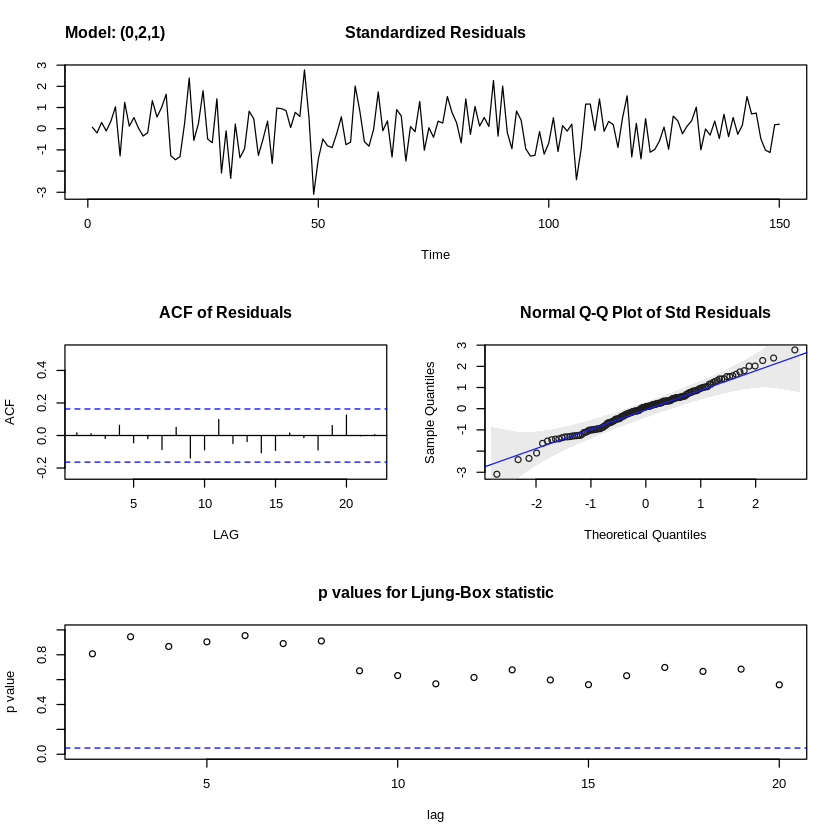

In [14]:
sarima(BJsales, 0,2,1,0,0,0)

## Fitted model can be seen by our results above

